In [1]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# remove warnings>
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor


from collections import Counter

In [2]:
iot = pd.read_csv('Train_Test_Network.csv')
iot.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [3]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [4]:
#feature creation
#word embeddings for weird_notice
weird_notice_locs = iot['weird_notice'].unique()
weird_notice_locs_mapping = dict(zip(weird_notice_locs, range(0, len(weird_notice_locs) + 1)))

iot['weird_notice'] = iot['weird_notice'] \
                               .map(weird_notice_locs_mapping) \
                               .astype(float)

In [5]:
#word embeddings for src_ip
src_ip_locs = iot['src_ip'].unique()
src_ip_locs_mapping = dict(zip(src_ip_locs, range(0, len(src_ip_locs) + 1)))

iot['src_ip'] = iot['src_ip'] \
                               .map(src_ip_locs_mapping) \
                               .astype(float)

In [6]:
#word embeddings for dst_ip
dst_ip_locs = iot['dst_ip'].unique()
dst_ip_locs_mapping = dict(zip(dst_ip_locs, range(0, len(dst_ip_locs) + 1)))

iot['dst_ip'] = iot['dst_ip'] \
                               .map(dst_ip_locs_mapping) \
                               .astype(float)

In [7]:
#word embeddings 
dst_ip_locs = iot['dst_ip'].unique()
dst_ip_locs_mapping = dict(zip(dst_ip_locs, range(0, len(dst_ip_locs) + 1)))

iot['dst_ip'] = iot['dst_ip'] \
                               .map(dst_ip_locs_mapping) \
                               .astype(float)


proto_locs = iot['proto'].unique()
proto_locs_mapping = dict(zip(proto_locs, range(0, len(proto_locs) + 1)))

iot['proto'] = iot['proto'] \
                               .map(proto_locs_mapping) \
                               .astype(float)


service_locs = iot['service'].unique()
service_locs_mapping = dict(zip(service_locs, range(0, len(service_locs) + 1)))

iot['service'] = iot['service'] \
                               .map(service_locs_mapping) \
                               .astype(float)


conn_state_locs = iot['conn_state'].unique()
conn_state_locs_mapping = dict(zip(conn_state_locs, range(0, len(conn_state_locs) + 1)))

iot['conn_state'] = iot['conn_state'] \
                               .map(conn_state_locs_mapping) \
                               .astype(float)

dns_query_locs = iot['dns_query'].unique()
dns_query_locs_mapping = dict(zip(dns_query_locs, range(0, len(dns_query_locs) + 1)))

iot['dns_query'] = iot['dns_query'] \
                               .map(dns_query_locs_mapping) \
                               .astype(float)

type_locs = iot['type'].unique()
type_locs_mapping = dict(zip(type_locs, range(0, len(type_locs) + 1)))

iot['type'] = iot['type'] \
                               .map(type_locs_mapping) \
                               .astype(float)


dns_AA_locs = iot['dns_AA'].unique()
dns_AA_locs_mapping = dict(zip(dns_AA_locs, range(0, len(dns_AA_locs) + 1)))

iot['dns_AA'] = iot['dns_AA'] \
                               .map(dns_AA_locs_mapping) \
                               .astype(float)


dns_RD_locs = iot['dns_RD'].unique()
dns_RD_locs_mapping = dict(zip(dns_RD_locs, range(0, len(dns_RD_locs) + 1)))

iot['dns_RD'] = iot['dns_RD'] \
                               .map(dns_RD_locs_mapping) \
                               .astype(float)


dns_RA_locs = iot['dns_RA'].unique()
dns_RA_locs_mapping = dict(zip(dns_RA_locs, range(0, len(dns_RA_locs) + 1)))

iot['dns_RA'] = iot['dns_RA'] \
                               .map(dns_RA_locs_mapping) \
                               .astype(float)


dns_rejected_locs = iot['dns_rejected'].unique()
dns_rejected_locs_mapping = dict(zip(dns_rejected_locs, range(0, len(dns_rejected_locs) + 1)))

iot['dns_rejected'] = iot['dns_rejected'] \
                               .map(dns_rejected_locs_mapping) \
                               .astype(float)


ssl_version_locs = iot['ssl_version'].unique()
ssl_version_locs_mapping = dict(zip(ssl_version_locs, range(0, len(ssl_version_locs) + 1)))

iot['ssl_version'] = iot['ssl_version'] \
                               .map(ssl_version_locs_mapping) \
                               .astype(float)


ssl_cipher_locs = iot['ssl_cipher'].unique()
ssl_cipher_locs_mapping = dict(zip(ssl_cipher_locs, range(0, len(ssl_cipher_locs) + 1)))

iot['ssl_cipher'] = iot['ssl_cipher'] \
                               .map(ssl_cipher_locs_mapping) \
                               .astype(float)


ssl_resumed_locs = iot['ssl_resumed'].unique()
ssl_resumed_locs_mapping = dict(zip(ssl_resumed_locs, range(0, len(ssl_resumed_locs) + 1)))

iot['ssl_resumed'] = iot['ssl_resumed'] \
                               .map(ssl_resumed_locs_mapping) \
                               .astype(float)


ssl_established_locs = iot['ssl_established'].unique()
ssl_established_locs_mapping = dict(zip(ssl_established_locs, range(0, len(ssl_established_locs) + 1)))

iot['ssl_established'] = iot['ssl_established'] \
                               .map(ssl_established_locs_mapping) \
                               .astype(float)


ssl_subject_locs = iot['ssl_subject'].unique()
ssl_subject_locs_mapping = dict(zip(ssl_subject_locs, range(0, len(ssl_subject_locs) + 1)))

iot['ssl_subject'] = iot['ssl_subject'] \
                               .map(ssl_subject_locs_mapping) \
                               .astype(float)


ssl_issuer_locs = iot['ssl_issuer'].unique()
ssl_issuer_locs_mapping = dict(zip(ssl_issuer_locs, range(0, len(ssl_issuer_locs) + 1)))

iot['ssl_issuer'] = iot['ssl_issuer'] \
                               .map(ssl_issuer_locs_mapping) \
                               .astype(float)


http_trans_depth_locs = iot['http_trans_depth'].unique()
http_trans_depth_locs_mapping = dict(zip(http_trans_depth_locs, range(0, len(http_trans_depth_locs) + 1)))

iot['http_trans_depth'] = iot['http_trans_depth'] \
                               .map(http_trans_depth_locs_mapping) \
                               .astype(float)


http_method_locs = iot['http_method'].unique()
http_method_locs_mapping = dict(zip(http_method_locs, range(0, len(http_method_locs) + 1)))

iot['http_method'] = iot['http_method'] \
                               .map(http_method_locs_mapping) \
                               .astype(float)


http_uri_locs = iot['http_uri'].unique()
http_uri_locs_mapping = dict(zip(http_uri_locs, range(0, len(http_uri_locs) + 1)))

iot['http_uri'] = iot['http_uri'] \
                               .map(http_uri_locs_mapping) \
                               .astype(float)


http_version_locs = iot['http_version'].unique()
http_version_locs_mapping = dict(zip(http_version_locs, range(0, len(http_version_locs) + 1)))

iot['http_version'] = iot['http_version'] \
                               .map(http_version_locs_mapping) \
                               .astype(float)


http_user_agent_locs = iot['http_user_agent'].unique()
http_user_agent_locs_mapping = dict(zip(http_user_agent_locs, range(0, len(http_user_agent_locs) + 1)))

iot['http_user_agent'] = iot['http_user_agent'] \
                               .map(http_user_agent_locs_mapping) \
                               .astype(float)


http_orig_mime_types_locs = iot['http_orig_mime_types'].unique()
http_orig_mime_types_locs_mapping = dict(zip(http_orig_mime_types_locs, range(0, len(http_orig_mime_types_locs) + 1)))

iot['http_orig_mime_types'] = iot['http_orig_mime_types'] \
                               .map(http_orig_mime_types_locs_mapping) \
                               .astype(float)


http_resp_mime_types_locs = iot['http_resp_mime_types'].unique()
http_resp_mime_types_locs_mapping = dict(zip(http_resp_mime_types_locs, range(0, len(http_resp_mime_types_locs) + 1)))

iot['http_resp_mime_types'] = iot['http_resp_mime_types'] \
                               .map(http_resp_mime_types_locs_mapping) \
                               .astype(float)


weird_name_locs = iot['weird_name'].unique()
weird_name_locs_mapping = dict(zip(weird_name_locs, range(0, len(weird_name_locs) + 1)))

iot['weird_name'] = iot['weird_name'] \
                               .map(weird_name_locs_mapping) \
                               .astype(float)


weird_addl_locs = iot['weird_addl'].unique()
weird_addl_locs_mapping = dict(zip(weird_addl_locs, range(0, len(weird_addl_locs) + 1)))

iot['weird_addl'] = iot['weird_addl'] \
                               .map(weird_addl_locs_mapping) \
                               .astype(float)


iot.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,0.0,1883,0.0,52976,0.0,0.0,80549.530260,1762852,41933215,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,1554198358,1.0,47260,1.0,15600,1.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
2,1554198359,2.0,1880,0.0,51782,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,1554198359,2.0,34296,0.0,10502,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
4,1554198362,2.0,46608,2.0,53,1.0,1.0,0.000549,0,298,...,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0
5,1554198364,1.0,33269,1.0,15600,1.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
6,1554198364,2.0,34296,0.0,10502,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
7,1554198364,2.0,1880,0.0,51782,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
8,1554198369,2.0,1880,0.0,51782,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0
9,1554198369,2.0,34296,0.0,10502,0.0,0.0,0.000000,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0


5000 Datasets

In [8]:
data = iot.sample(n = 5000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 52143 to 393332
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ts                      5000 non-null   int64  
 1   src_ip                  5000 non-null   float64
 2   src_port                5000 non-null   int64  
 3   dst_ip                  5000 non-null   float64
 4   dst_port                5000 non-null   int64  
 5   proto                   5000 non-null   float64
 6   service                 5000 non-null   float64
 7   duration                5000 non-null   float64
 8   src_bytes               5000 non-null   int64  
 9   dst_bytes               5000 non-null   int64  
 10  conn_state              5000 non-null   float64
 11  missed_bytes            5000 non-null   int64  
 12  src_pkts                5000 non-null   int64  
 13  src_ip_bytes            5000 non-null   int64  
 14  dst_pkts                5000 non-n

In [9]:
print('If there is any missing data in the dataset: \n',any(data.isnull()))

If there is any missing data in the dataset: 
 True


In [10]:
#delete the rows if there are null values
data=data.dropna(axis=0,how='any')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 52143 to 393332
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ts                      5000 non-null   int64  
 1   src_ip                  5000 non-null   float64
 2   src_port                5000 non-null   int64  
 3   dst_ip                  5000 non-null   float64
 4   dst_port                5000 non-null   int64  
 5   proto                   5000 non-null   float64
 6   service                 5000 non-null   float64
 7   duration                5000 non-null   float64
 8   src_bytes               5000 non-null   int64  
 9   dst_bytes               5000 non-null   int64  
 10  conn_state              5000 non-null   float64
 11  missed_bytes            5000 non-null   int64  
 12  src_pkts                5000 non-null   int64  
 13  src_ip_bytes            5000 non-null   int64  
 14  dst_pkts                5000 non-n

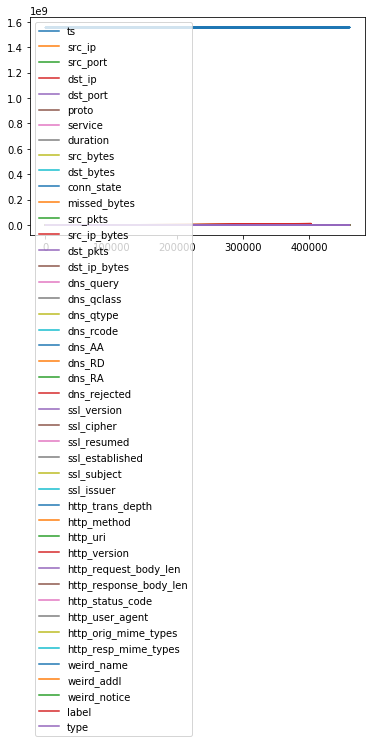

In [12]:
data.plot()

0    3259
1    1741
Name: label, dtype: int64


Text(0,0.5,'Percentage')

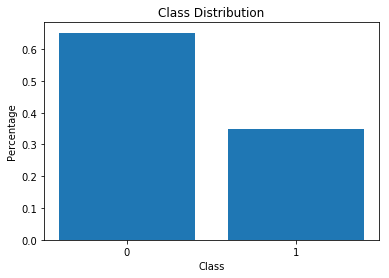

In [13]:
#check imblance
# Use the `value_counts` method to check the count of each class in the variable
class_dist = data['label'].value_counts()
print(class_dist)

# Create a bar plot of this distribution using matplotlib
plt.bar(class_dist.index.astype(str), class_dist.values/sum(class_dist.values))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

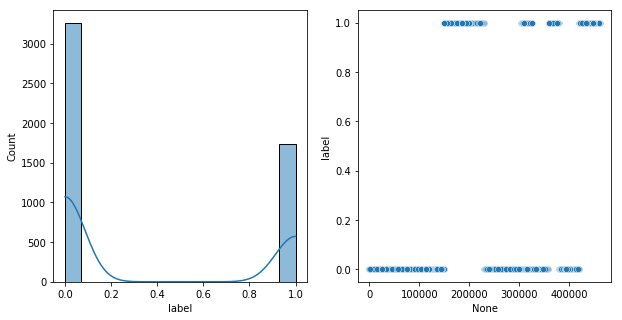

In [14]:
#label distribution
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data, x='label',kde=True,ax=ax[0])

sns.scatterplot(data=data,x=data.index, y='label',ax=ax[1])

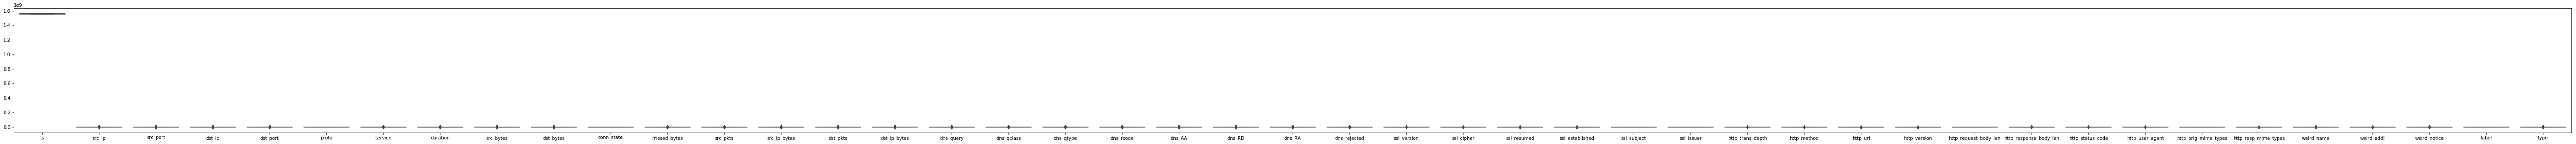

In [54]:
#check if there are any exceptions
plt.figure(figsize=(100,5)) 
sns.boxplot(data=data)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


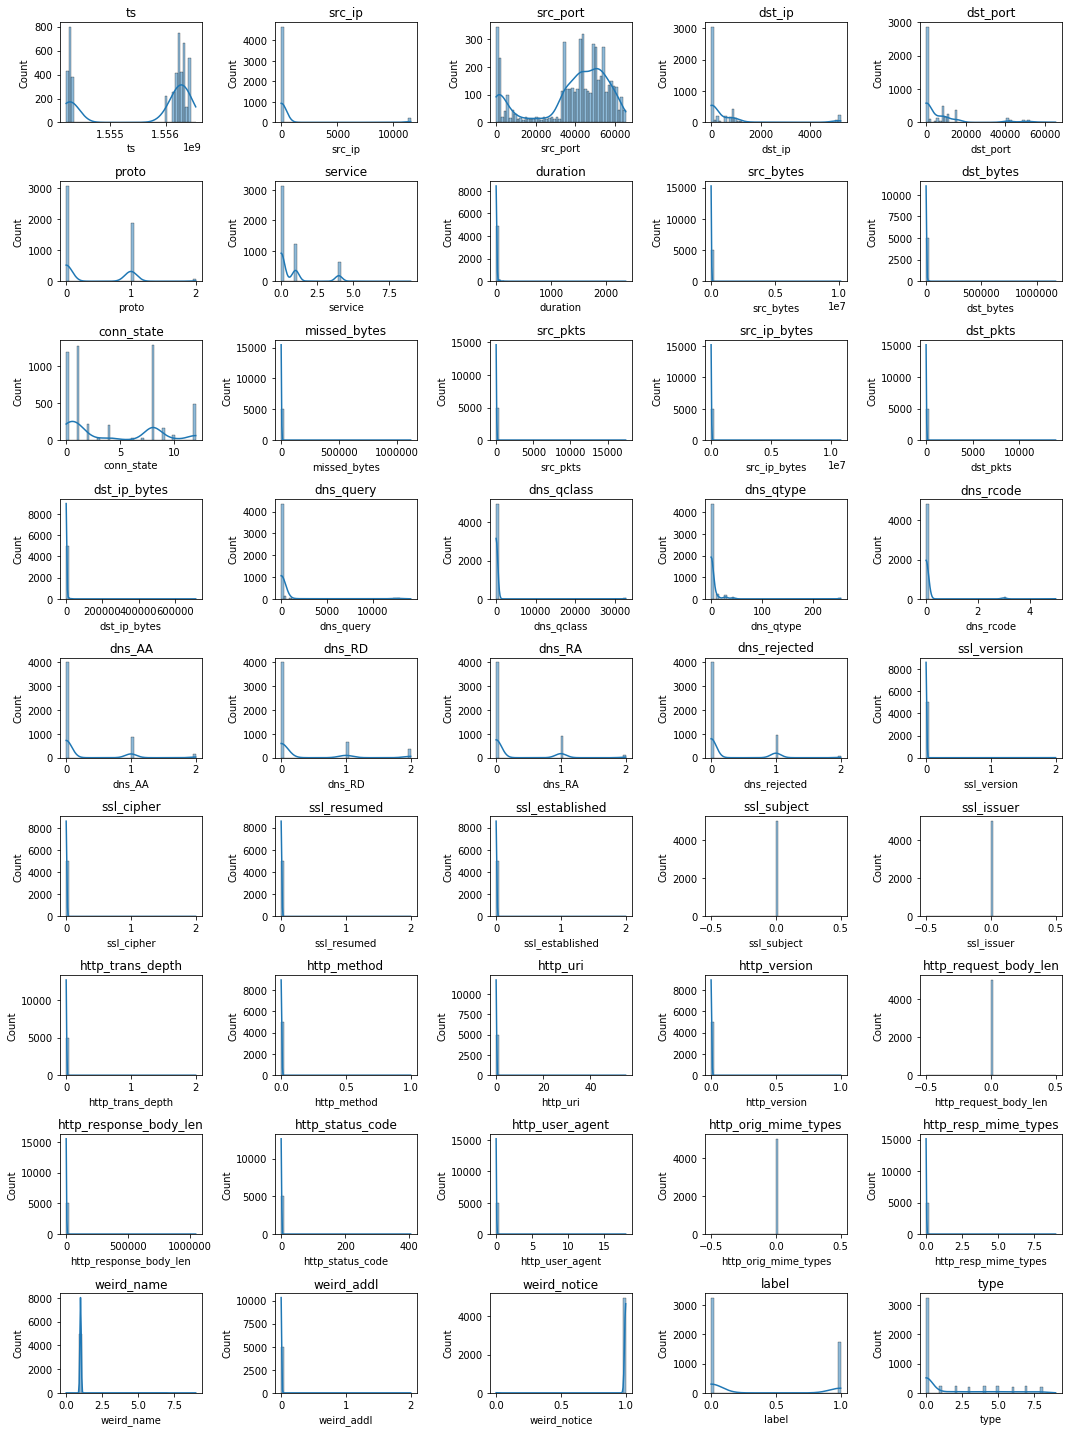

In [16]:
# distribution of features
plt.figure(figsize=(15,20)) 
i=0
for col in data.select_dtypes('number').columns:
    i+=1
    ax=plt.subplot(9,5,i)
    ax.set_title(col)
    sns.histplot(data[col],bins=50,kde=True,ax=ax)
    
plt.tight_layout()
plt.show()

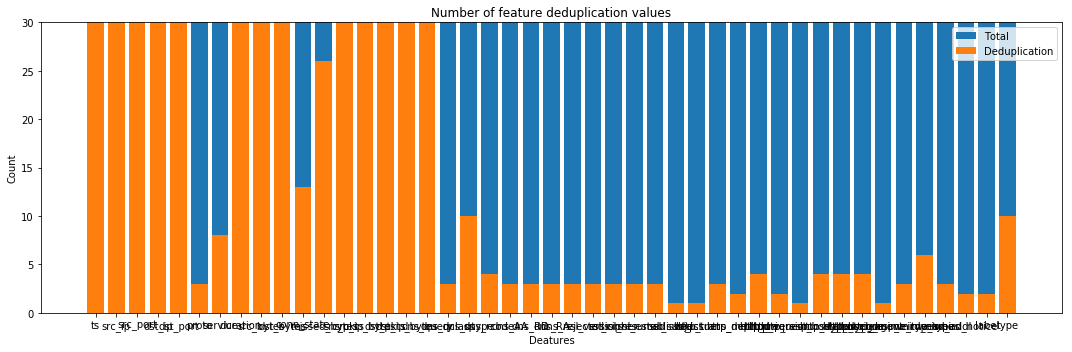

In [17]:
#check the numbers of different features
lists_unique=[data[col].nunique() for col in data.columns]

plt.figure(figsize=(15,5))
plt.bar(data.columns, [data.shape[0]]*data.shape[1])
plt.bar(data.columns, np.array(lists_unique)) 

plt.ylim(0,30)
plt.title('Number of feature deduplication values')
plt.xlabel('Deatures')
plt.ylabel('Count')
plt.legend(['Total','Deduplication'])
plt.tight_layout()
plt.show()

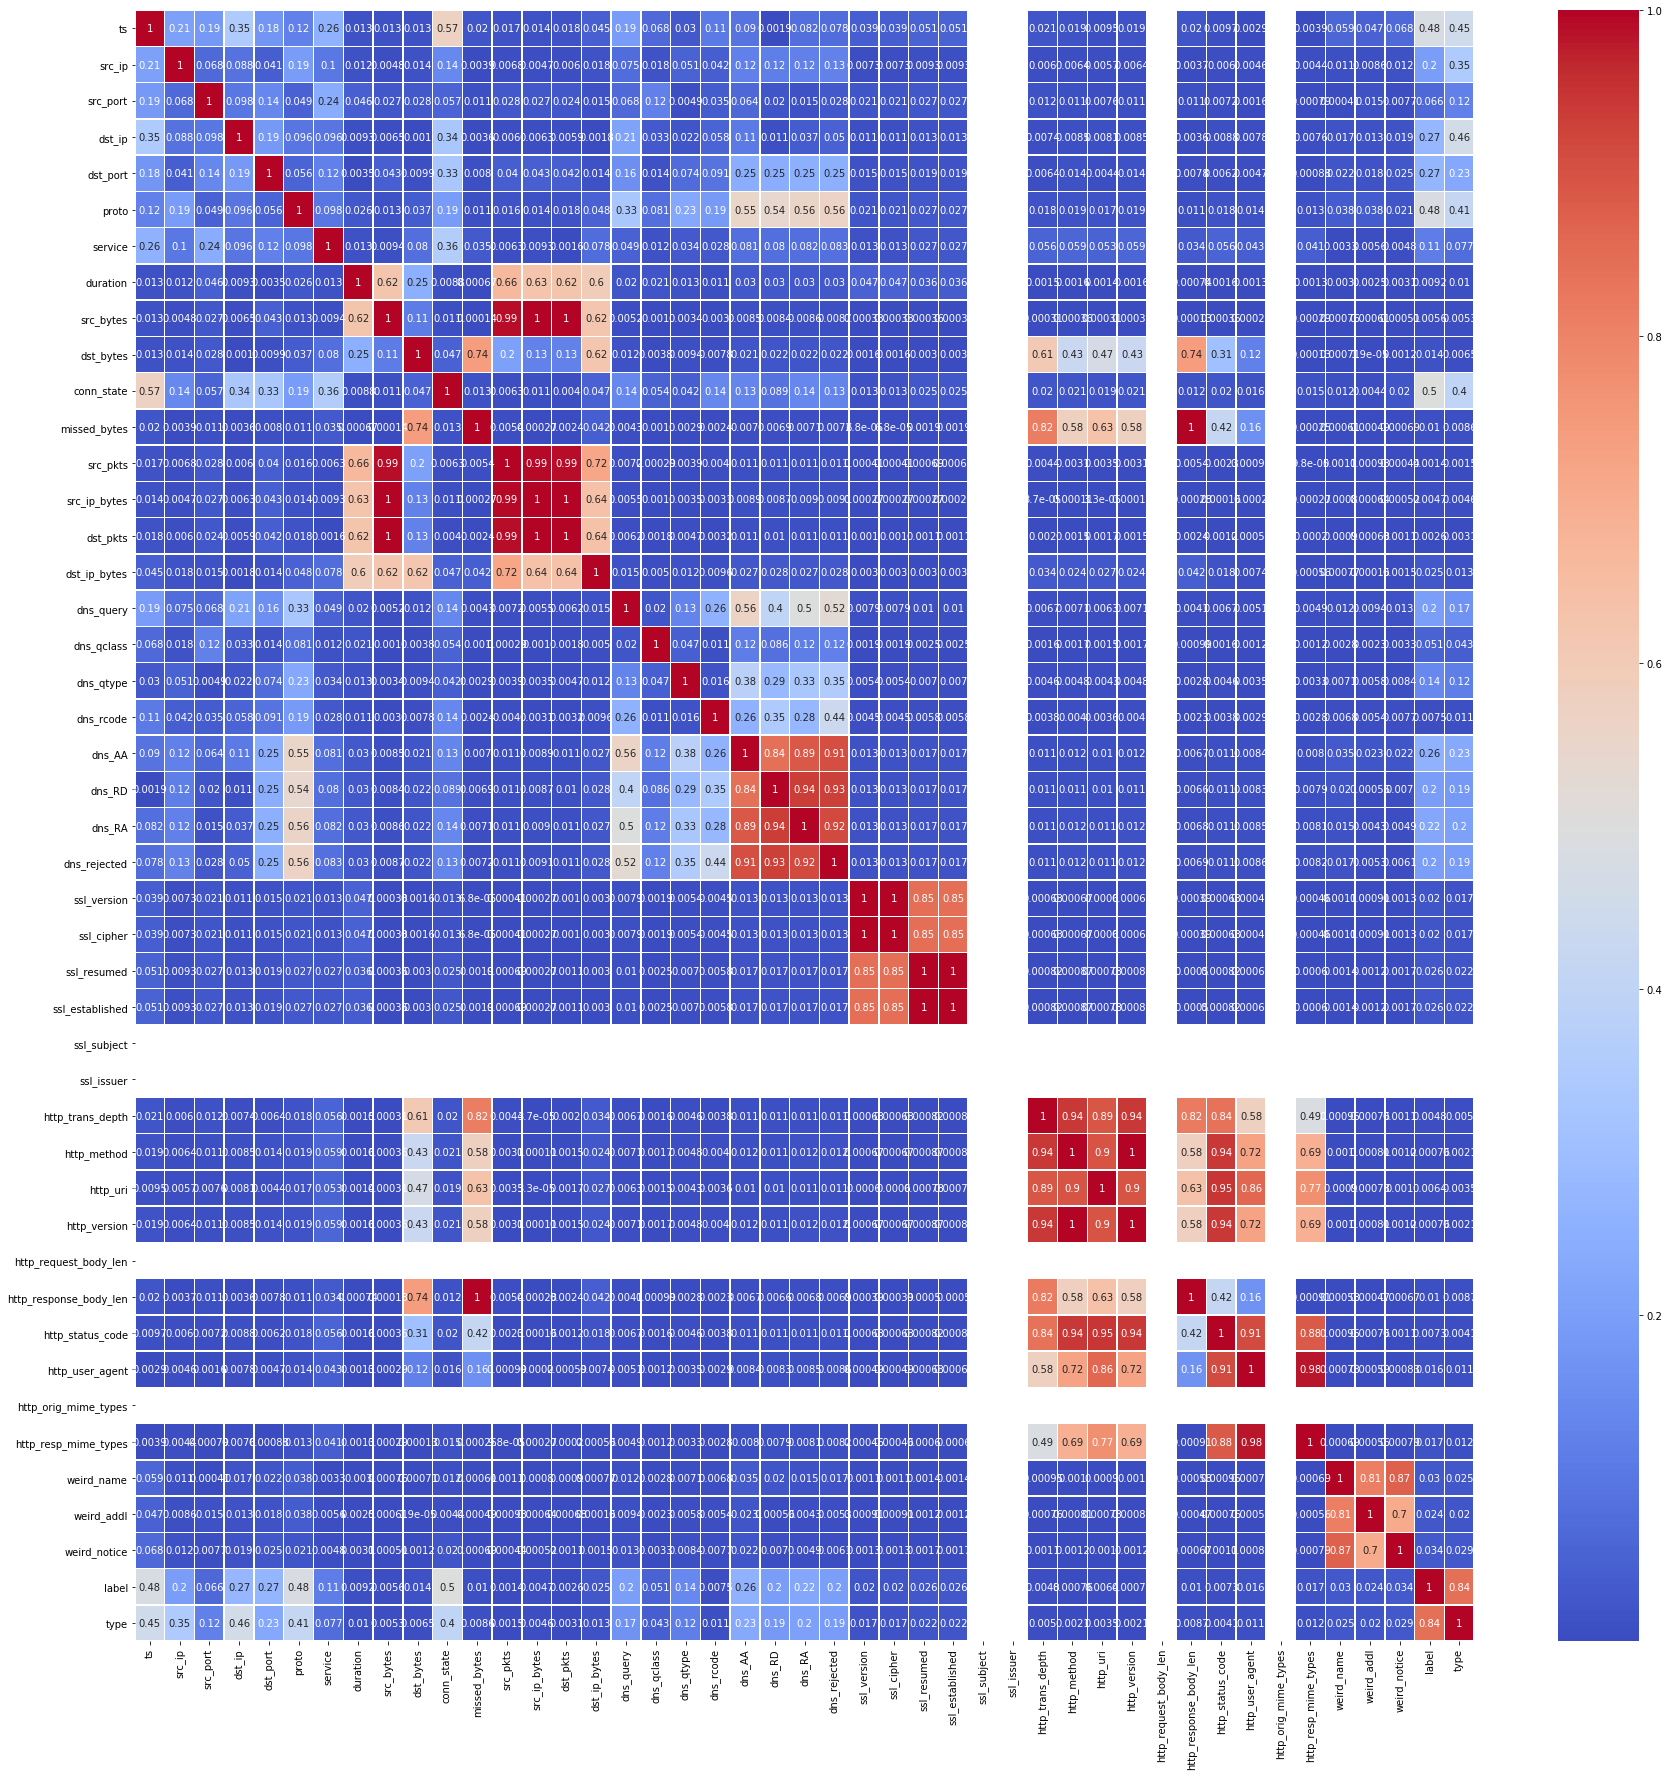

In [18]:
#draw the correlation coefficient graph
plt.figure(figsize=(30,30))
data_corr = data.corr().abs()
sns.heatmap(data_corr,annot=True,cmap='coolwarm',linewidths=.5)

In [19]:
#train the model and split
from sklearn.model_selection import train_test_split

features = data.drop(['label'],axis=1)
target = data[['label']]
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=123,shuffle=True)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4000, 44) (1000, 44)
(4000, 1) (1000, 1)


In [20]:
#baseline
predict=np.array([np.median(y_train)]*len(y_train))
baseline_score=f1_score(y_train,predict,average='weighted')

baseline_score = round(baseline_score.mean(),10)
print(baseline_score)

0.5187766954


Model Selection

In [21]:
#GaussianNB
bys = GaussianNB()
bys.fit(x_train, y_train)
bys_train_score = cross_val_score(bys, x_train, y_train, scoring='f1_weighted',cv=5)
bys_train_score = round(bys_train_score.mean(),10)
bys_score = bys.score(x_test, y_test)
bys_prediction = bys.predict(x_test)

print(bys_train_score)
print(bys_score)
print(classification_report(y_test,bys_prediction))

0.7347850247
0.746
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       638
           1       0.59      1.00      0.74       362

    accuracy                           0.75      1000
   macro avg       0.79      0.80      0.75      1000
weighted avg       0.85      0.75      0.75      1000



E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\

In [22]:
#XGBClassifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(max_depth= 100)
xgb_classifier.fit(x_train, y_train)
xgb_train_score = cross_val_score(xgb_classifier, x_train, y_train, scoring='f1_weighted',cv=5)
xgb_train_score = round(xgb_train_score.mean(),10)
xgb_score = xgb_classifier.score(x_test, y_test)
xgb_prediction = xgb_classifier.predict(x_test)

print(xgb_train_score)
print(xgb_score)
print(classification_report(y_test,xgb_prediction))

[15:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[15:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[15:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00       362

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [29]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
svc_train_score = cross_val_score(linear_svc, x_train, y_train, scoring='f1_weighted',cv=5)
svc_train_score = round(svc_train_score.mean(),10)
svc_score = linear_svc.score(x_test, y_test)
svc_prediction = linear_svc.predict(x_test)

print(svc_train_score)
print(svc_score)
print(classification_report(y_test,svc_prediction))
#LinearSVC

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d 

0.3821886588
0.638
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       638
           1       0.00      0.00      0.00       362

    accuracy                           0.64      1000
   macro avg       0.32      0.50      0.39      1000
weighted avg       0.41      0.64      0.50      1000



E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:124

In [24]:
#LGBMClassifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
lgb_train_score = cross_val_score(lgb_model, x_train, y_train, scoring='f1_weighted',cv=5)
lgb_train_score = round(lgb_train_score.mean(),10)
lgb_score = lgb_model.score(x_test, y_test)
lgb_prediction = lgb_model.predict(x_test)

print(lgb_train_score)
print(lgb_score)
print(classification_report(y_test,lgb_prediction))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00       362

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
models = pd.DataFrame({
    'Model': ['GaussianNB', 'XGBClassifier', 
              'LinearSVC', 'LGBMClassifier', 'baseline_model'],
        'test_Score': [bys_score, xgb_score, svc_score,
                 lgb_score, baseline_score]
})
print(models)

            Model  test_Score
0      GaussianNB    0.746000
1   XGBClassifier    1.000000
2       LinearSVC    0.638000
3  LGBMClassifier    1.000000
4  baseline_model    0.518777


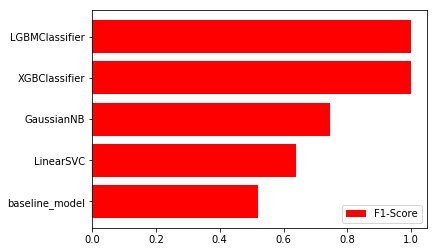

In [26]:
#compare the f1 score, performance of all the models
index=models.sort_values(by='test_Score', ascending=True).index
data_plot=models.loc[index,:]
plt.barh(data_plot.Model,data_plot.test_Score,color='r')
plt.legend(['F1-Score'])

Whole Dataset

In [30]:
#delete the rows if there are null values
iot=iot.dropna(axis=0,how='any')

In [31]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  float64
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  float64
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  float64
 6   service                 461043 non-null  float64
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  float64
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

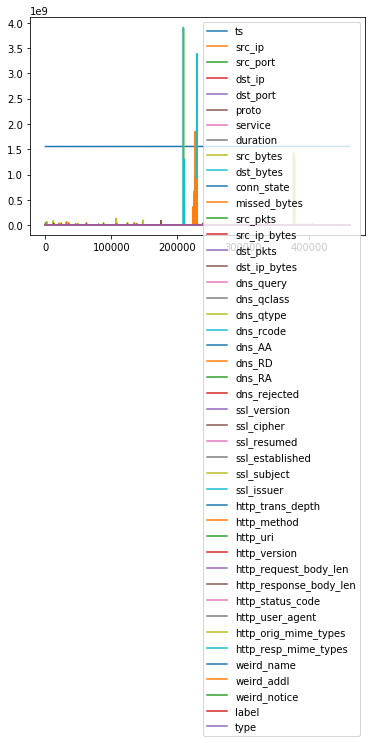

In [32]:
iot.plot()

0    300000
1    161043
Name: label, dtype: int64


Text(0,0.5,'Percentage')

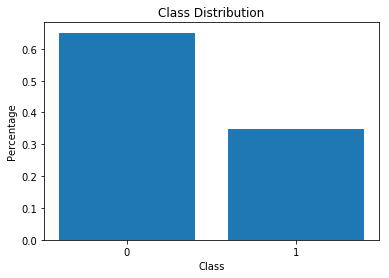

In [33]:
#check imblance
# Use the `value_counts` method to check the count of each class in the variable
class_dist = iot['label'].value_counts()
print(class_dist)

# Create a bar plot of this distribution using matplotlib
plt.bar(class_dist.index.astype(str), class_dist.values/sum(class_dist.values))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

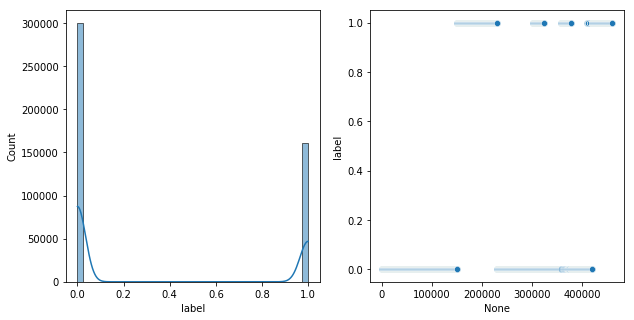

In [34]:
#label distribution
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(iot, x='label',kde=True,ax=ax[0])

sns.scatterplot(data=iot,x=iot.index, y='label',ax=ax[1])

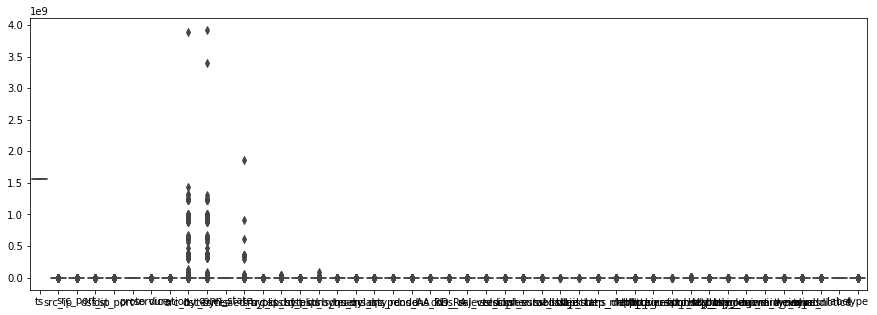

In [35]:
#check if there are any exceptions
plt.figure(figsize=(15,5)) 
sns.boxplot(data=iot)

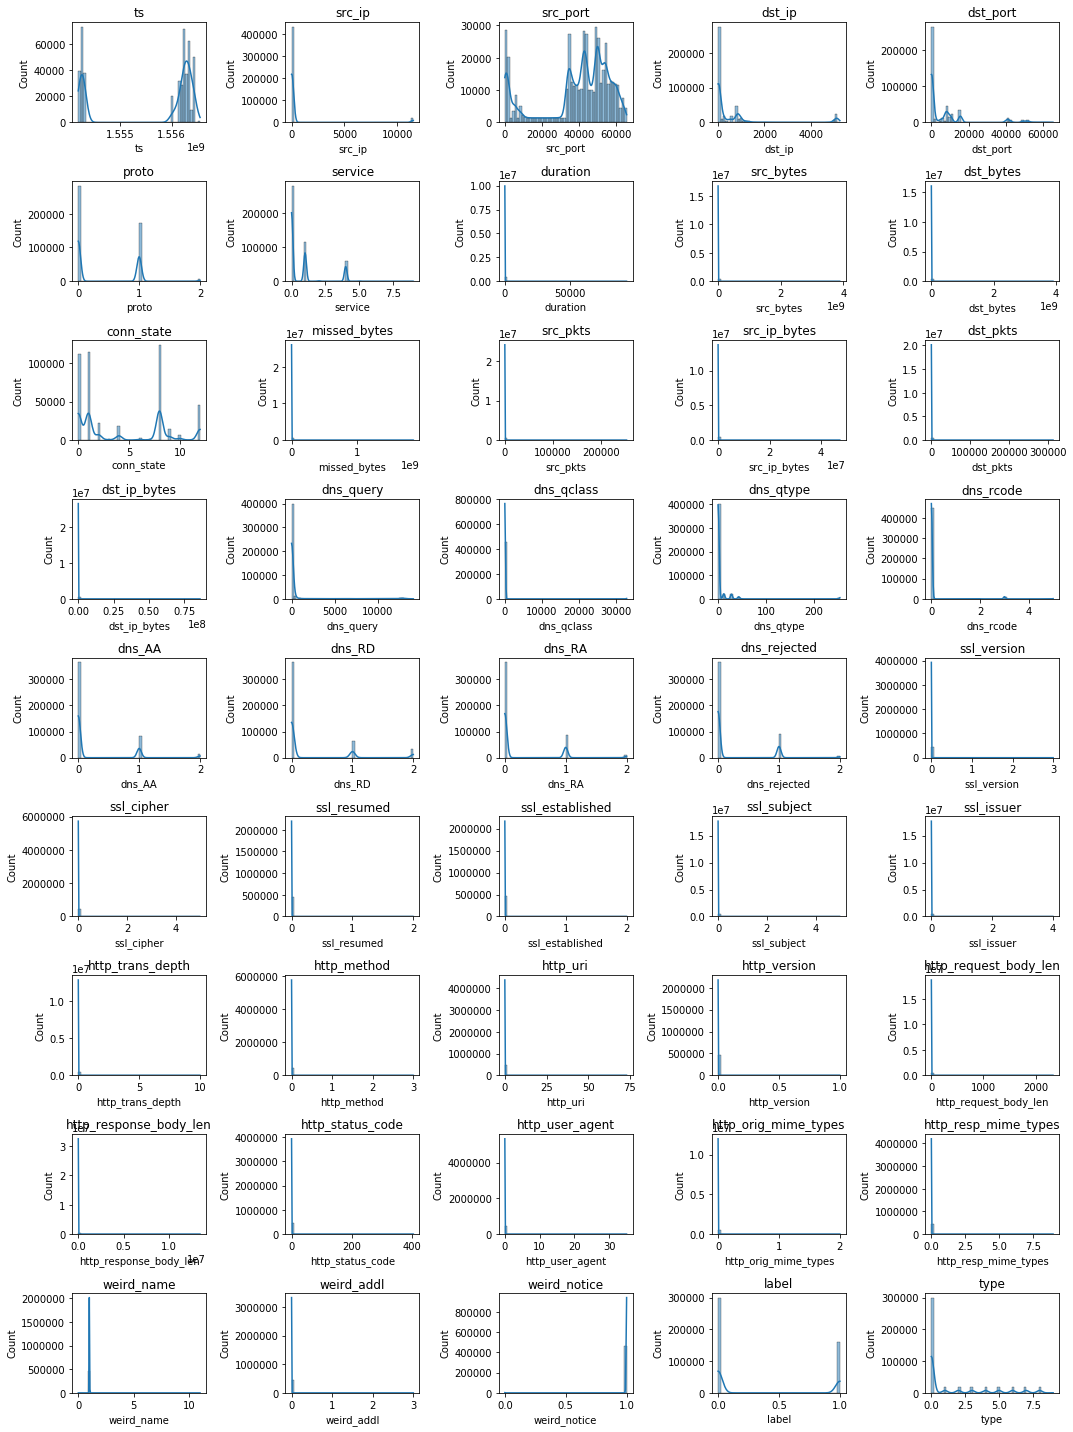

In [36]:
# distribution of features
plt.figure(figsize=(15,20)) 
i=0
for col in iot.select_dtypes('number').columns:
    i+=1
    ax=plt.subplot(9,5,i)
    ax.set_title(col)
    sns.histplot(iot[col],bins=50,kde=True,ax=ax)
    
plt.tight_layout()
plt.show()

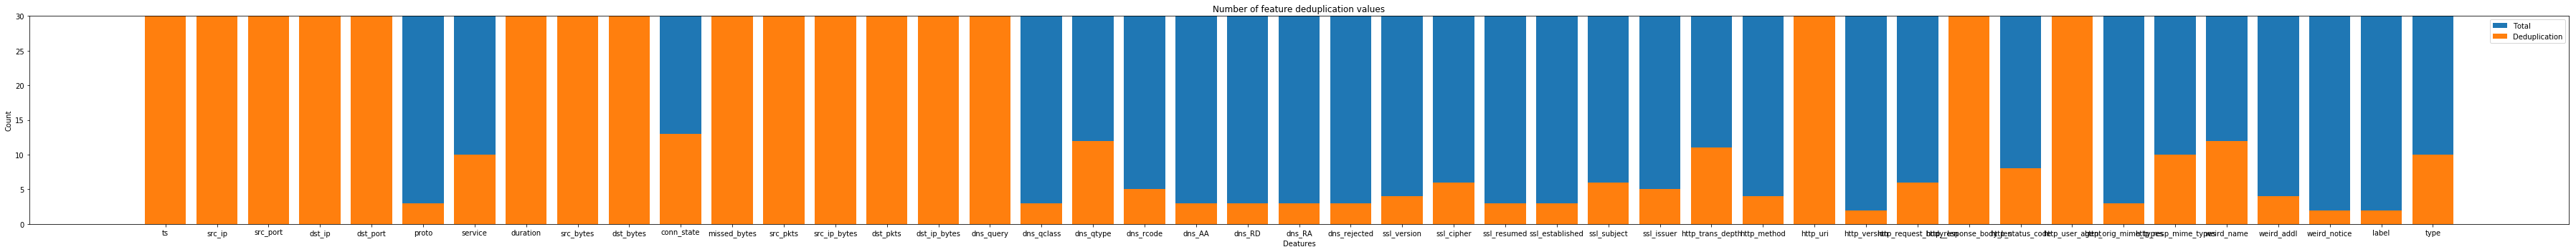

In [55]:
#check the numbers of different features
lists_unique=[iot[col].nunique() for col in iot.columns]

plt.figure(figsize=(50,5))
plt.bar(iot.columns, [iot.shape[0]]*iot.shape[1])
plt.bar(iot.columns, np.array(lists_unique)) 

plt.ylim(0,30)
plt.title('Number of feature deduplication values')
plt.xlabel('Deatures')
plt.ylabel('Count')
plt.legend(['Total','Deduplication'])
plt.tight_layout()
plt.show()

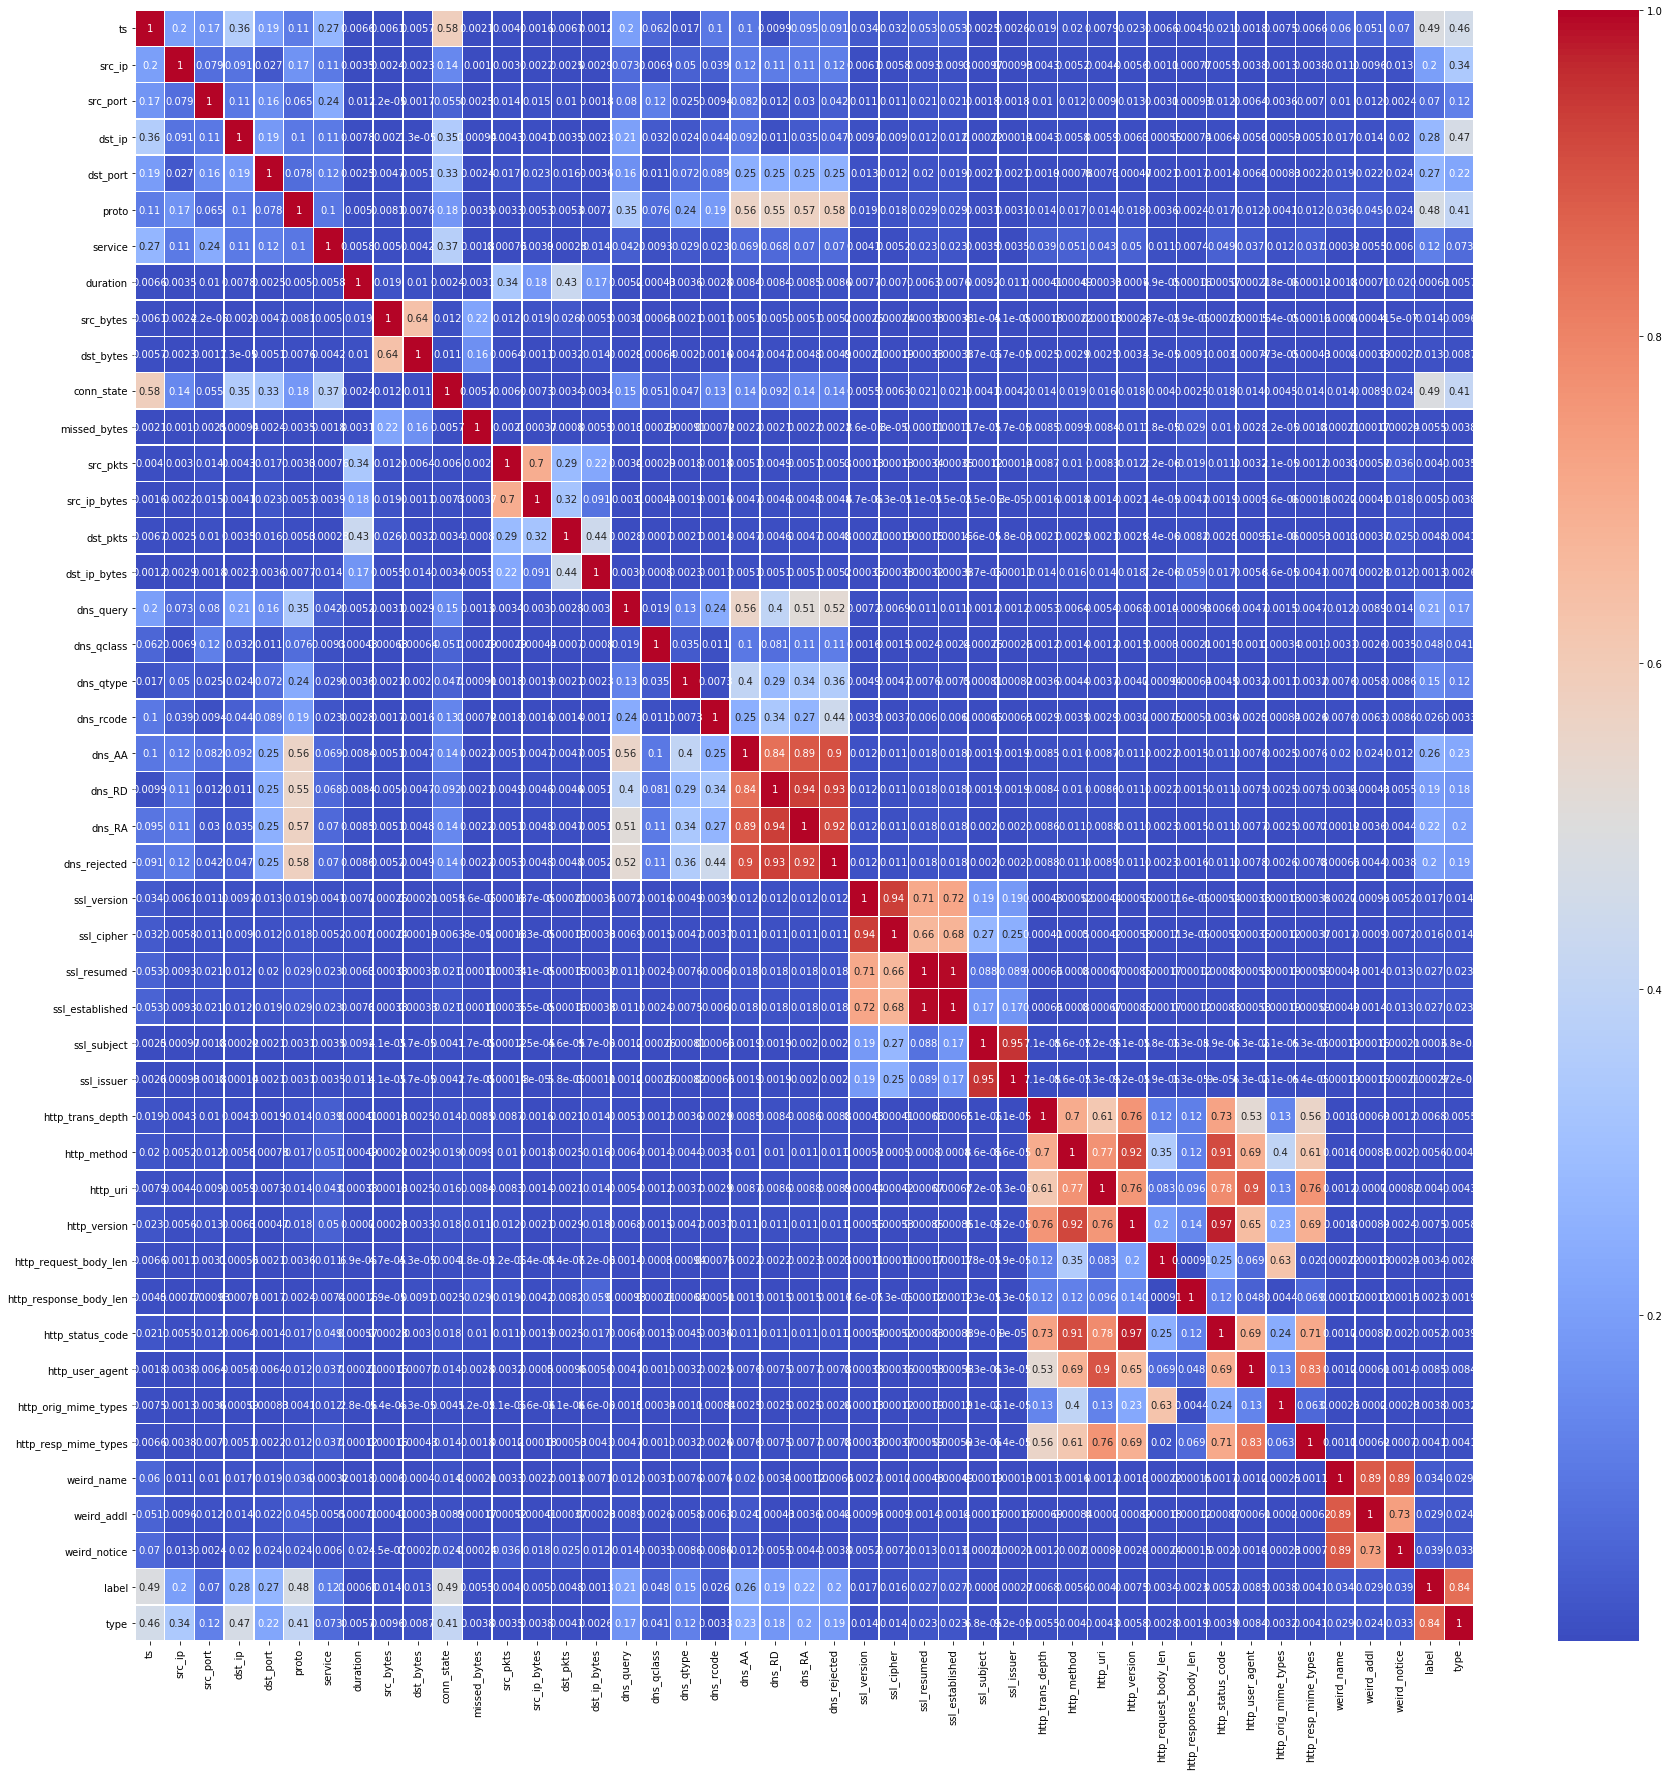

In [38]:
#draw the correlation coefficient graph
plt.figure(figsize=(30,30))
iot_corr = iot.corr().abs()
sns.heatmap(iot_corr,annot=True,cmap='coolwarm',linewidths=.5)

In [39]:
#train the model and split
from sklearn.model_selection import train_test_split

features = iot.drop(['label'],axis=1)
target = iot[['label']]
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=123,shuffle=True)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(368834, 44) (92209, 44)
(368834, 1) (92209, 1)


In [40]:
#baseline
predict=np.array([np.median(y_train)]*len(y_train))
baseline_score=f1_score(y_train,predict,average='weighted')

baseline_score = round(baseline_score.mean(),10)
print(baseline_score)

0.5128895234


In [41]:
#GaussianNB
bys = GaussianNB()
bys.fit(x_train, y_train)
bys_train_score = cross_val_score(bys, x_train, y_train, scoring='f1_weighted',cv=5)
bys_train_score = round(bys_train_score.mean(),10)
bys_score = bys.score(x_test, y_test)
bys_prediction = bys.predict(x_test)

print(bys_train_score)
print(bys_score)
print(classification_report(y_test,bys_prediction))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\

0.7552484233
0.7368803479053021
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     60034
           1       0.75      0.37      0.49     32175

    accuracy                           0.74     92209
   macro avg       0.74      0.65      0.66     92209
weighted avg       0.74      0.74      0.71     92209



In [42]:
#XGBClassifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(max_depth= 100)
xgb_classifier.fit(x_train, y_train)
xgb_train_score = cross_val_score(xgb_classifier, x_train, y_train, scoring='f1_weighted',cv=5)
xgb_train_score = round(xgb_train_score.mean(),10)
xgb_score = xgb_classifier.score(x_test, y_test)
xgb_prediction = xgb_classifier.predict(x_test)

print(xgb_train_score)
print(xgb_score)
print(classification_report(y_test,xgb_prediction))

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60034
           1       1.00      1.00      1.00     32175

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209



In [48]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
svc_train_score = cross_val_score(linear_svc, x_train, y_train, scoring='f1_weighted',cv=5)
svc_train_score = round(svc_train_score.mean(),10)
svc_score = linear_svc.score(x_test, y_test)
svc_prediction = linear_svc.predict(x_test)

print(svc_train_score)
print(svc_score)
print(classification_report(y_test,svc_prediction))
#LinearSVC

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d 

0.5132402088
0.6511945688598727
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     60034
           1       1.00      0.00      0.00     32175

    accuracy                           0.65     92209
   macro avg       0.83      0.50      0.39     92209
weighted avg       0.77      0.65      0.51     92209



E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
#LGBMClassifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
lgb_train_score = cross_val_score(lgb_model, x_train, y_train, scoring='f1_weighted',cv=5)
lgb_train_score = round(lgb_train_score.mean(),10)
lgb_score = lgb_model.score(x_test, y_test)
lgb_prediction = lgb_model.predict(x_test)

print(lgb_train_score)
print(lgb_score)
print(classification_report(y_test,lgb_prediction))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaconda\lib\

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60034
           1       1.00      1.00      1.00     32175

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209



In [49]:
models = pd.DataFrame({
    'Model': ['GaussianNB', 'XGBClassifier', 
              'LinearSVC', 'LGBMClassifier', 'baseline_model'],
        'test_Score': [bys_score, xgb_score, svc_score,
                 lgb_score, baseline_score]
})
print(models)

            Model  test_Score
0      GaussianNB    0.736880
1   XGBClassifier    1.000000
2       LinearSVC    0.651195
3  LGBMClassifier    1.000000
4  baseline_model    0.512890


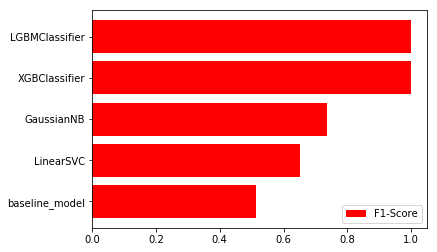

In [50]:
#compare the f1 score, performance of all the models
index=models.sort_values(by='test_Score', ascending=True).index
data_plot=models.loc[index,:]
plt.barh(data_plot.Model,data_plot.test_Score,color='r')
plt.legend(['F1-Score'])